#Credit Worthiness of Customers

##Introduction:
We have a dataset of a bank pertaining to presenting loan to individules. Data contains 10 columns and 1000 rows, it has information regarding Age, Job, type of Housing, savings account, checking account, credit amount, Duration of repayment and purpose of loan, the dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository.We have to analyze the data after filling the missing values if any and cleaning the data to answer some of the questions asked.

##Objective:
The main aim of this project is to find the credit worthiness of the customers.

Perform basic exploration of data.

Perform exploratory data analysis and provide key insights derived from the same, backed with suitable graphs and plots. Perform univariate, bivariate and multivariate analysis. 

Conduct the following steps only as necessary along with the reason behind doing it with suitable steps;

    1.Missing values

    2.Erroneous/wrong values

    3.Skewed data and outliers

How many highly skilled men (below 35 years) are staying in their own house?

Visualize men and females separately for their social status.

##Dataset Description:
Columns of the dataset and their meaning are as follows;

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (text - little, moderate, rich)

Credit amount (numeric, in Deutsche Mark)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others

##Installing required libraries

We start by installing the required libraries like NumPy, Pandas, Matplotlib, Seaborn missingo and simpleImputer

In [200]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer


##Readig the uploaded file
We read the files using pandas

In [201]:
EDA = pd.read_csv('EDA.csv')
EDA.head(10)    #Checking data of 1st 10 rows

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


##Questions


###Perform basic exploration of data.

In [202]:
print("Number of rows:",EDA.shape[0],"\n""Number of clomns:",EDA.shape[1])    #Number of rows & columns

Number of rows: 1000 
Number of clomns: 10


In [203]:
EDA.columns     #Finding column names

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [204]:
d1=EDA.rename(columns={'Unnamed: 0':'Index','Saving accounts':'Saving_accounts','Checking account':'Checking_account','Credit amount':'Credit_amount'})       #Renaming the columns with rename function
d1.head()

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Renaming the columns with proper names

In [205]:
d1.info()                                #getting the info of the dataset, like null values and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving_accounts   817 non-null    object
 6   Checking_account  606 non-null    object
 7   Credit_amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [206]:
d1 = d1.astype({"Sex":'category',                                 #converting the data type to correct format
                "Job":'category',
                "Housing":'category',
                "Saving_accounts":'category',
                "Checking_account":'category',
                "Purpose":'category',
                "Age":'float',
                "Job":'category',
                "Credit_amount":'float',
                "Duration":'float'})

Chainging the data types to category and numerical float, as we need it in further analysis. 

In [207]:
d1.info()                                                        #getting the info of the dataset, like null values and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Index             1000 non-null   int64   
 1   Age               1000 non-null   float64 
 2   Sex               1000 non-null   category
 3   Job               1000 non-null   category
 4   Housing           1000 non-null   category
 5   Saving_accounts   817 non-null    category
 6   Checking_account  606 non-null    category
 7   Credit_amount     1000 non-null   float64 
 8   Duration          1000 non-null   float64 
 9   Purpose           1000 non-null   category
dtypes: category(6), float64(3), int64(1)
memory usage: 38.4 KB


In [208]:
d1.nunique()     #To find number of unique values

Index               1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving_accounts        4
Checking_account       3
Credit_amount        921
Duration              33
Purpose                8
dtype: int64

In [209]:
d1.isna().sum()   #Finding number of null values

Index                 0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

In [210]:
d1.duplicated().sum()   #To check duplicates of data

0

In [211]:
d1_num = d1.select_dtypes(include='number').columns    # Separating numerical columns from the table
d1.describe(include='number').drop(columns='Index')

,Age,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


###Conduct the following steps only as necessary along with the reason behind doing it with suitable steps;

Missing values

Erroneous/wrong values

Skewed data and outliers

In [212]:
EDA_miss = d1.isnull()  #To find missing values
EDA_miss

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,True,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [213]:
EDA_miss.mean() * 100  # finding the percentage of missing values.

Index                0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving_accounts     18.3
Checking_account    39.4
Credit_amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

From the above we can clearly see only two columns has missing values that is of 18.3% and 39.4%

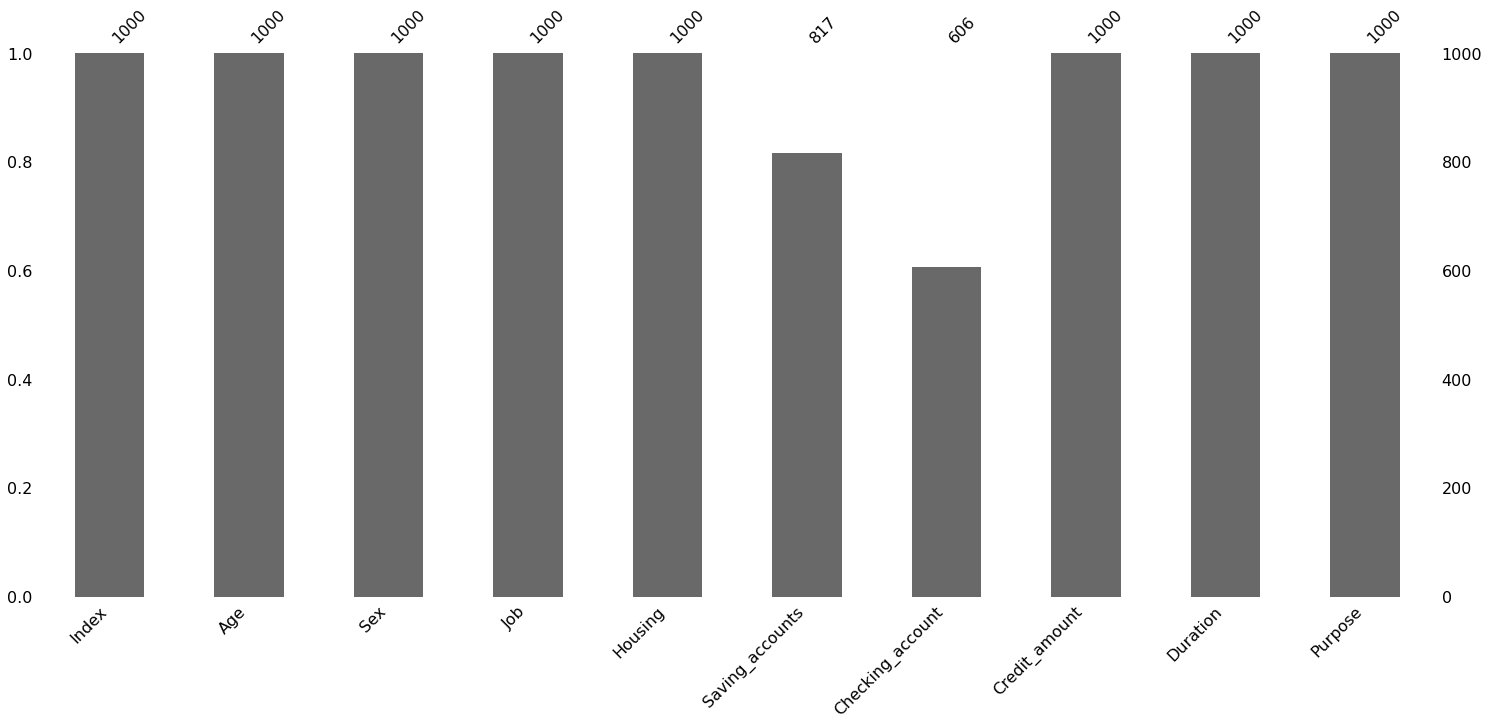

In [214]:
msno.bar(d1) # Visulaizing the missing values

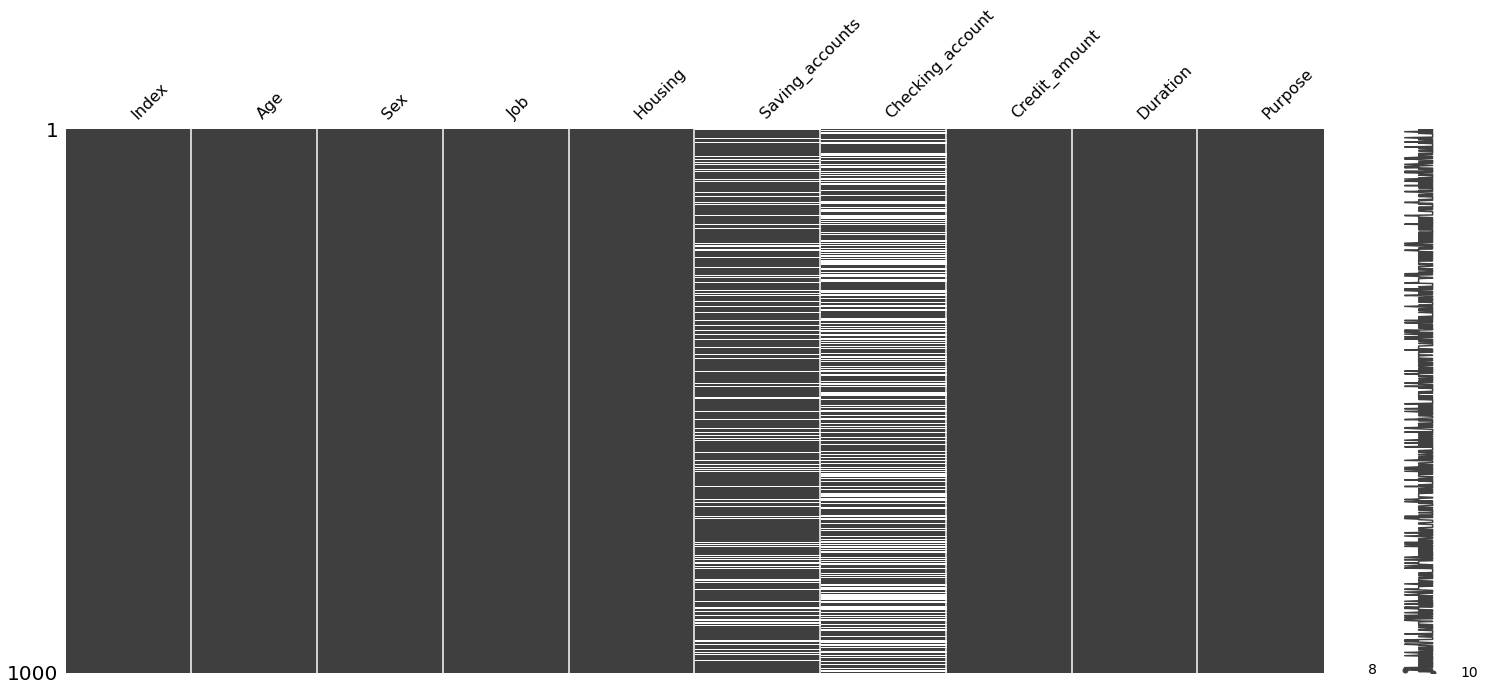

In [19]:
msno.matrix(d1) #ploting the graph to view the positons of missing values

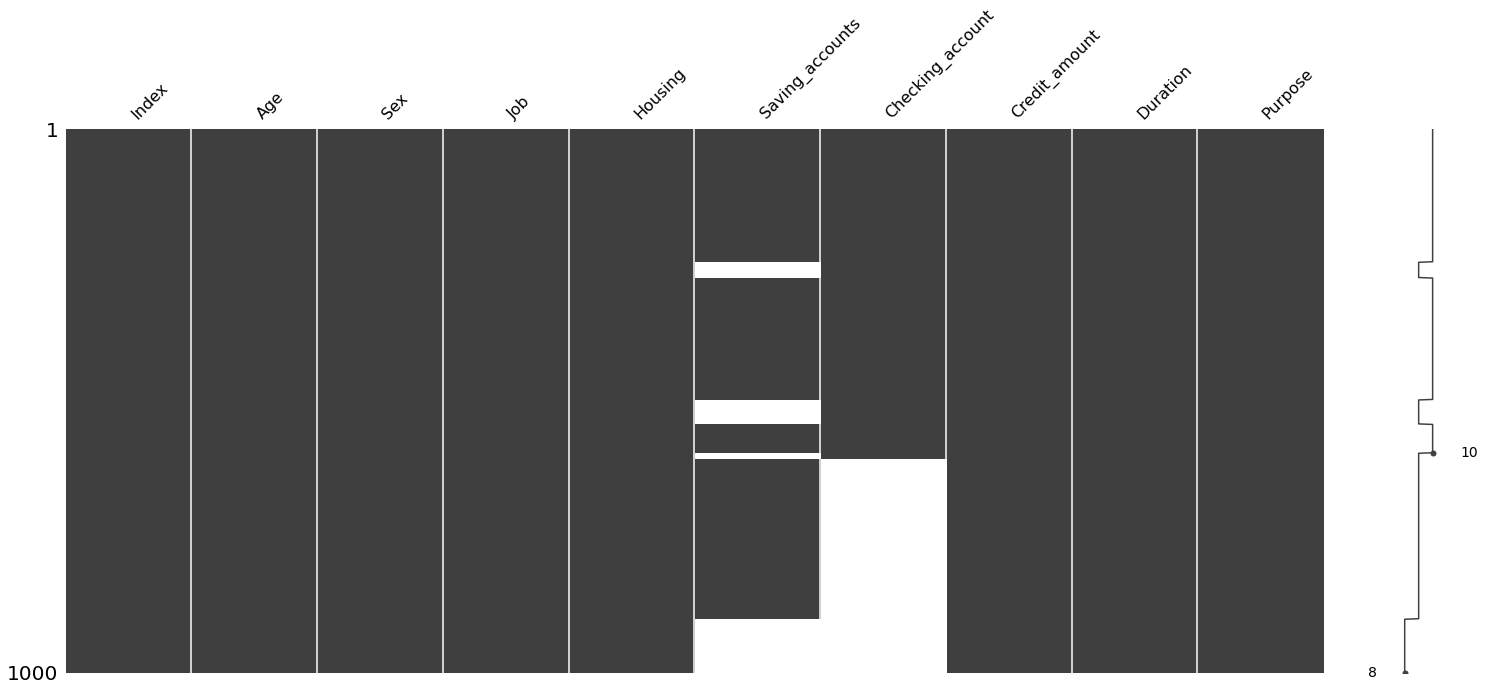

In [149]:
Sort = d1.sort_values(['Checking_account','Saving_accounts']) #sort_values() method is used to sort the values for the required columns
msno.matrix(Sort) 
plt.show()

From the above graph we can see the amount of data missing, if we try to remove all the missing value data together we might loose more than 50% of the data, therfore replacing the missing values is better option.

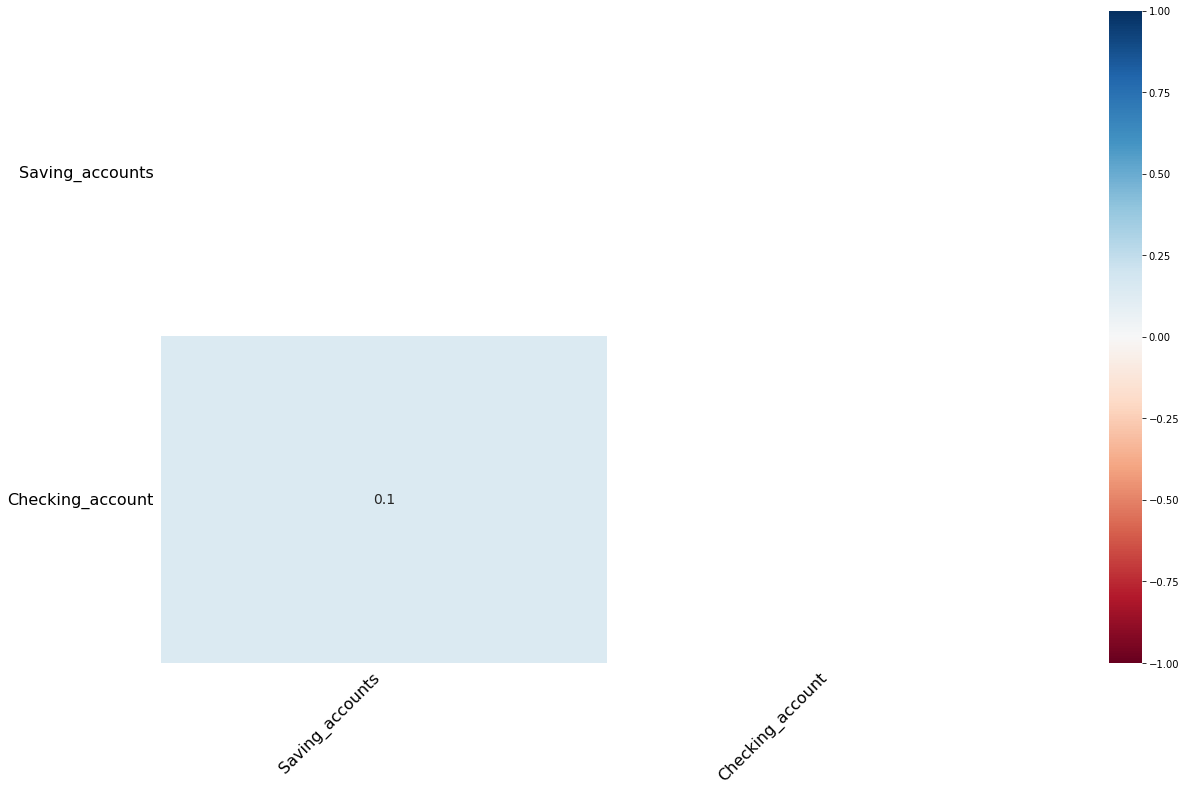

In [215]:
msno.heatmap(d1) # Heatmap graph ussing missingno

Finding out the corelation between the columns, from the above we can clearly see there are no correlation between the columns. 

In [216]:
d1['Checking_account'].unique() #getting the unique values of the column Checking Account

['little', 'moderate', NaN, 'rich']
Categories (3, object): ['little', 'moderate', 'rich']

In [217]:
d1['Saving_accounts'].unique()   #getting the unique values of the column Ssaving Account

[NaN, 'little', 'quite rich', 'rich', 'moderate']
Categories (4, object): ['little', 'moderate', 'quite rich', 'rich']

In [218]:
d1['Saving_accounts'] = d1.Saving_accounts.map({'little':0, 'moderate':1, 'rich':2, 'quite rich':3})  #mapping catogerical data with numerical data
d1['Checking_account'] = d1.Checking_account.map({'little':0, 'moderate':1, 'rich':2})
d1.head()

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,0,67.0,male,2,own,NaN,0,1169.0,6.0,radio/TV
1,1,22.0,female,2,own,0,1,5951.0,48.0,radio/TV
2,2,49.0,male,1,own,0,NaN,2096.0,12.0,education
3,3,45.0,male,2,free,0,0,7882.0,42.0,furniture/equipment
4,4,53.0,male,2,free,0,0,4870.0,24.0,car


Chainging the categorical to numerical in order to find mean, median, mode which suits the best for replcing.

In [219]:
d1['Saving_accounts'].fillna(d1['Saving_accounts'].mode()[0], inplace=True)      #Filling the mising values with mode using fillna
d1['Checking_account'].fillna(d1['Checking_account'].mode()[0], inplace=True)
d1.head()

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,0,67.0,male,2,own,0,0,1169.0,6.0,radio/TV
1,1,22.0,female,2,own,0,1,5951.0,48.0,radio/TV
2,2,49.0,male,1,own,0,0,2096.0,12.0,education
3,3,45.0,male,2,free,0,0,7882.0,42.0,furniture/equipment
4,4,53.0,male,2,free,0,0,4870.0,24.0,car


Replacing both the columns missing data with mode as it is the best techinique to fill the missing Data of a categorical data set.

In [220]:
round(d1[d1_num].drop(columns='Index').skew(),2) # Getting the Skewness of all the numerical columns

Age              1.02
Credit_amount    1.95
Duration         1.09
dtype: float64

highly skew ------- <-1 & >1                  --	Credit_amount \
moderate skew -----	(-1 to -0.5) & (o.5 to 1)	--  Age, Duration  \
symmetrical skew --	-0.5 to 0.5	

In [221]:
d1['Saving_accounts'] = d1.Saving_accounts.map({0:'little', 1:'moderate', 2:'rich', 3:'quite rich'}) #chainging the numerical back to catogerical as the replacement is done.
d1['Checking_account'] = d1.Checking_account.map({0:'little', 1:'moderate', 2:'rich'})

In [35]:
def outliers(d1,*var):                         #defining a function called Outliers
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Outliers in {i}', fontsize=15)   #drawing the required plot by defining a function.
        sns.boxplot(data= d1, x=i)
        plt.show()
        print()
        q1,q2 = np.percentile(d1[i],(25,75))
        IQR = q2 -q1                                   #Calculating IQR
        Max = q2 + 1.5 * IQR
        Min = q1 - 1.5 * IQR
        Outlayer = d1[(d1[i]<Min) | (d1[i]>Max)]
        print(f'Outliers in {i}: ', round(Outlayer.shape[0]/d1.shape[0]*100,2),'%')   #Calculating the % of outlayer. 
        print()

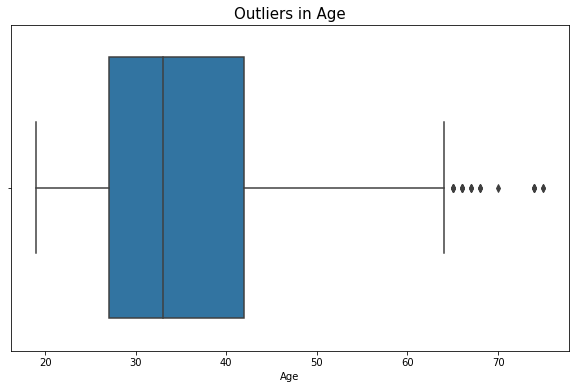


Outliers in Age:  2.3 %



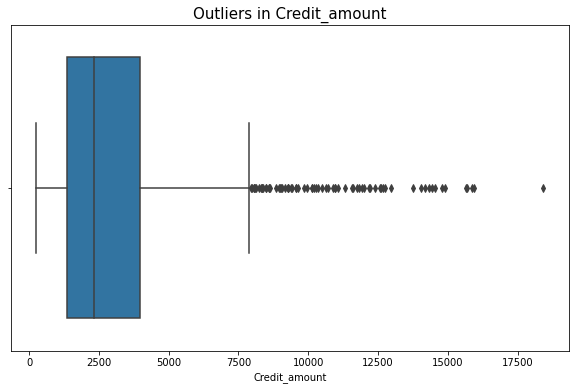


Outliers in Credit_amount:  7.2 %



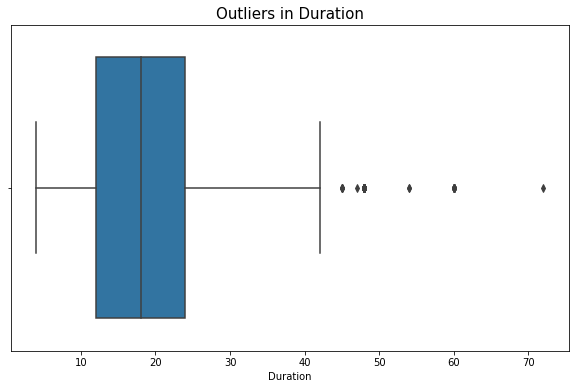


Outliers in Duration:  7.0 %



In [36]:
outliers(d1,'Age','Credit_amount', 'Duration')  # Calling the above defined function to get the results.

From the above we can clearly see the outliers as well as percentage of outliers.

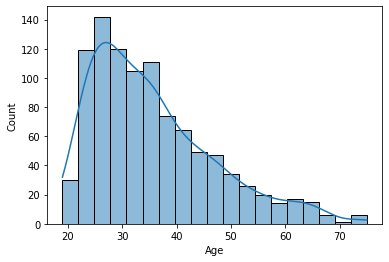

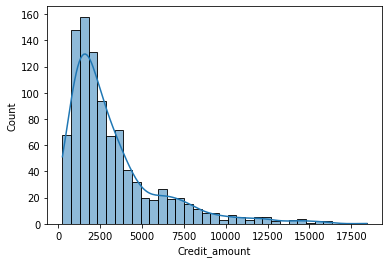

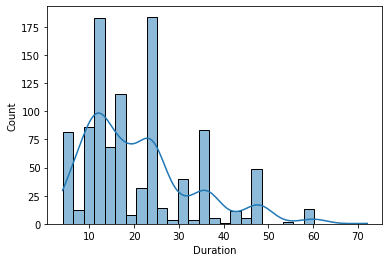

In [38]:
sns.histplot(d1, x= 'Age', kde = True)                      #using sns histplot to draw histograph
plt.show()
sns.histplot(d1, x= 'Credit_amount', kde = True)
plt.show()
sns.histplot(d1, x= 'Duration', kde = True)
plt.show()

From the above graph we can directly infer that all the above parametrs are highly or moderately skewed. Applicants between the ages of 20 to 30 are more likely to apply for a loan. Credit loan is more concentrated below 5000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


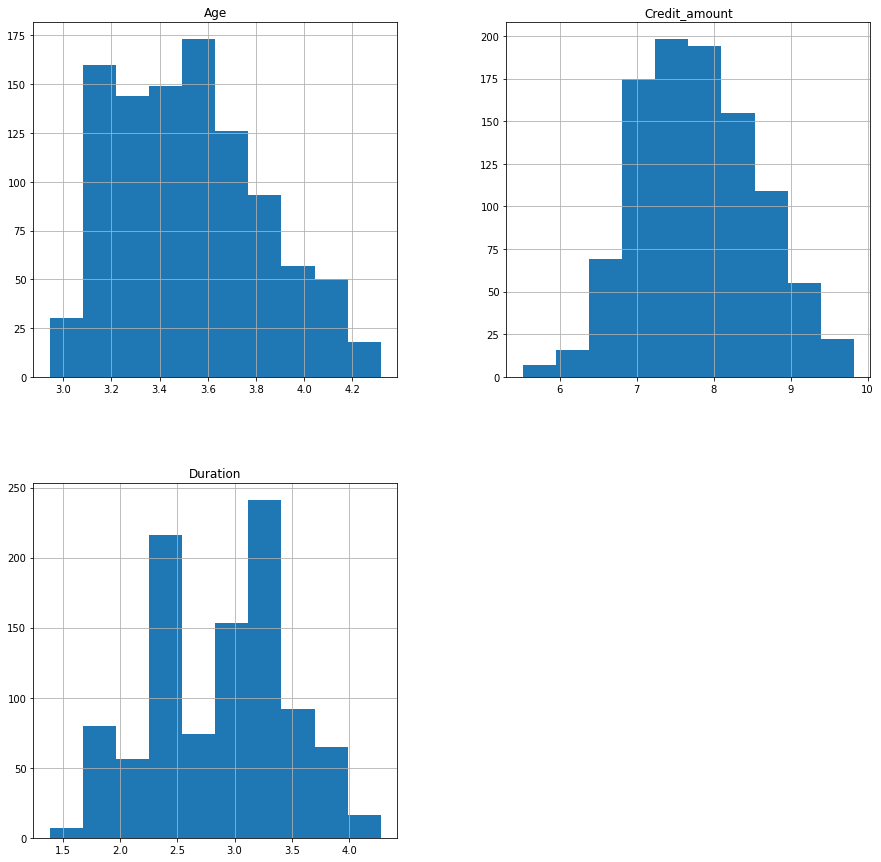

In [159]:
K = d1[['Age','Credit_amount','Duration']]
for i in K:
 K[i] = np.log(K[i])                     #performed Log transform by converting the data to log
K.hist(figsize=(15,15),bins=10)
plt.show()

Performed log transformation to reduce skewness, from the above graph we can see that all 3 graphs have achived somewhat symetrical shape, we have used log transform here as it is very popular and we get the desired results most of the time.

###Perform exploratory data analysis and provide key insights derived from the same, backed with suitable graphs and plots. Perform univariate, bivariate and multivariate analysis.

In [222]:
d1['Job'] = d1['Job'].map({0:'unskilled & non_resident',1:'unskilled & resident',2:'skilled',3:'highly skilled'})  #Maping the Categories of Job

Text(0.5, 0.98, 'Distribution of Sex')

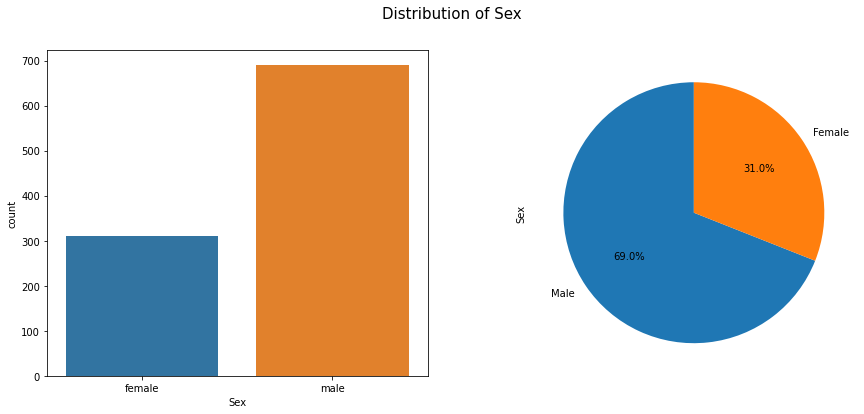

In [66]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,6))         # using subplot to get the graphs in same line
sns.countplot(x=d1.Sex , ax=ax[0])                                       # using countplot to get countplot, using ax[0] to get 1st countplot
d1.Sex.value_counts().plot(kind='pie', labels =['Male','Female'], autopct='%1.1f%%', startangle=90, ax=ax[1])   # Using plot and kind as pie to get a piechart with start angle as 90, using ax[1] to get piechart in 2nd column
fig.suptitle('Distribution of Sex', fontsize=15)                         # using suptitle to give the title for the graph

From the above two graphs we can clearly see the distribution of Male and Female, we can infer that count of Male is more than that of Female.

Text(0.5, 0.98, 'Distribution of Jobs')

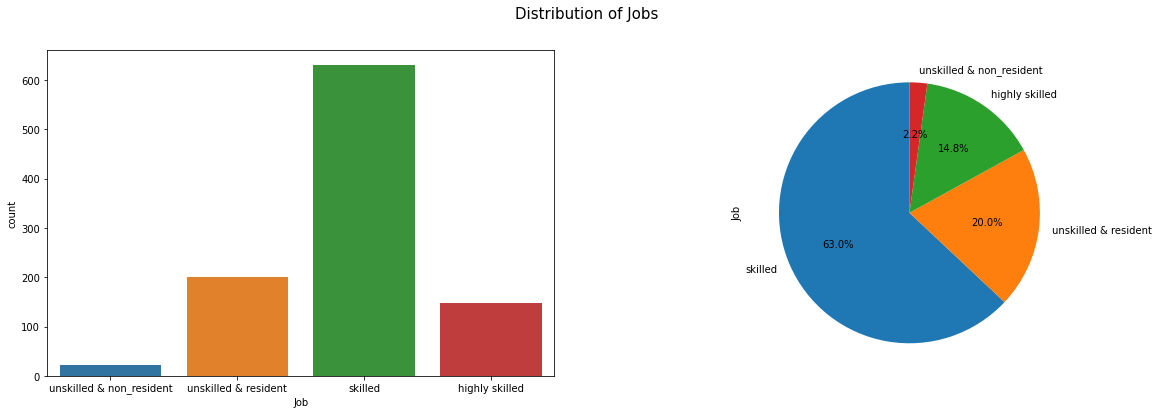

In [65]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (20,6))              # using subplot to get the graphs in same line
sns.countplot(x=d1.Job , ax=ax[0])                                            # using countplot to get countplot, using ax[0] to get 1st countplot
d1.Job.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[1])   #Using plot and kind as pie to get a piechart with start angle as 90
fig.suptitle('Distribution of Jobs', fontsize=15)

From the above two graphs we can clearly see the distribution of Job, we can infer that count of Skilled workers is more.

Text(0.5, 0.98, 'Distribution of Housing')

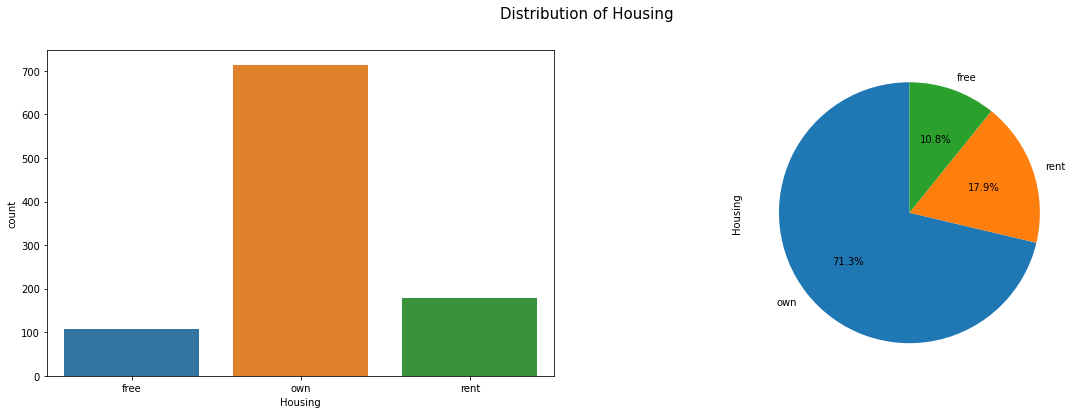

In [64]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (20,6))               # using subplot to get the graphs in same line
sns.countplot(x=d1.Housing , ax=ax[0])                                          # using countplot to get countplot, using ax[0] to get 1st countplot
d1.Housing.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[1])  #Using plot and kind as pie to get a piechart with start angle as 90
fig.suptitle('Distribution of Housing', fontsize=15)

From the above two graphs we can clearly see the distribution of Housing, we can infer that count of Own housing category is more.

Text(0.5, 0.98, 'Distribution of Savings Accounts')

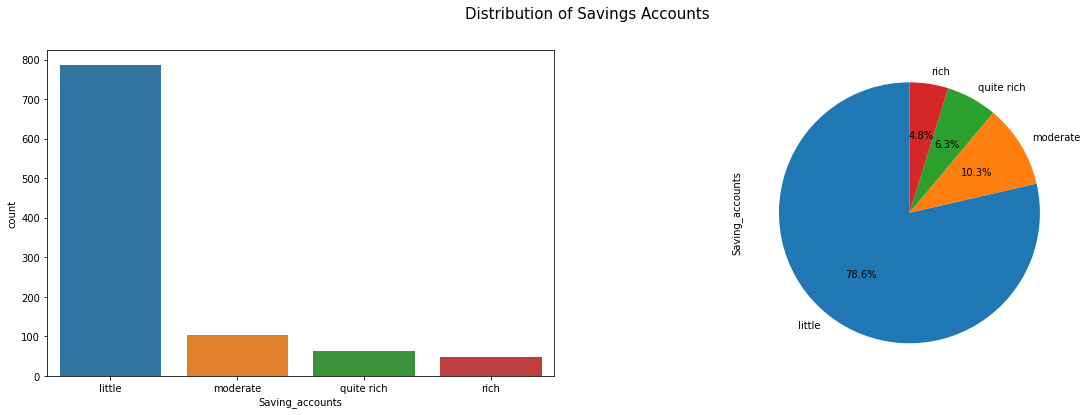

In [63]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (20,6))               # using subplot to get the graphs in same line
sns.countplot(x=d1.Saving_accounts , ax=ax[0])                                 # using countplot to get countplot, using ax[0] to get 1st countplot
d1.Saving_accounts.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[1]) #Using plot and kind as pie to get a piechart with start angle as 90
fig.suptitle('Distribution of Savings Accounts', fontsize=15)

From the above two graphs we can clearly see the distribution of Saving accounts, we can infer that count of little catogery is more.

Text(0.5, 0.98, 'Distribution of Checking Account')

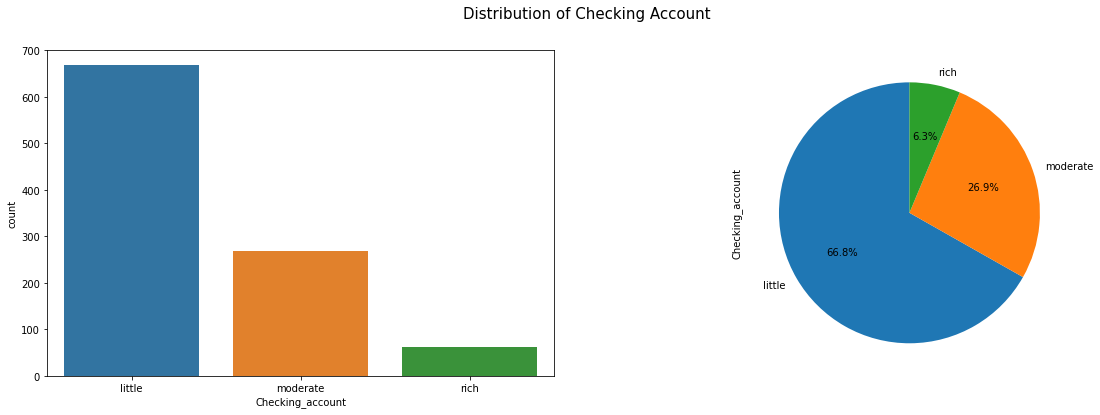

In [54]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (20,6))              # using subplot to get the graphs in same line
sns.countplot(x=d1.Checking_account , ax=ax[0])                                # using countplot to get countplot, using ax[0] to get 1st countplot
d1.Checking_account.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[1])    #Using plot and kind as pie to get a piechart with start angle as 90
fig.suptitle('Distribution of Checking Account', fontsize=15) 

From the above two graphs we can clearly see the distribution of Checking accounts, we can infer that count of little catogery is more.

Text(0.5, 0.98, 'Distribution of Purpose')

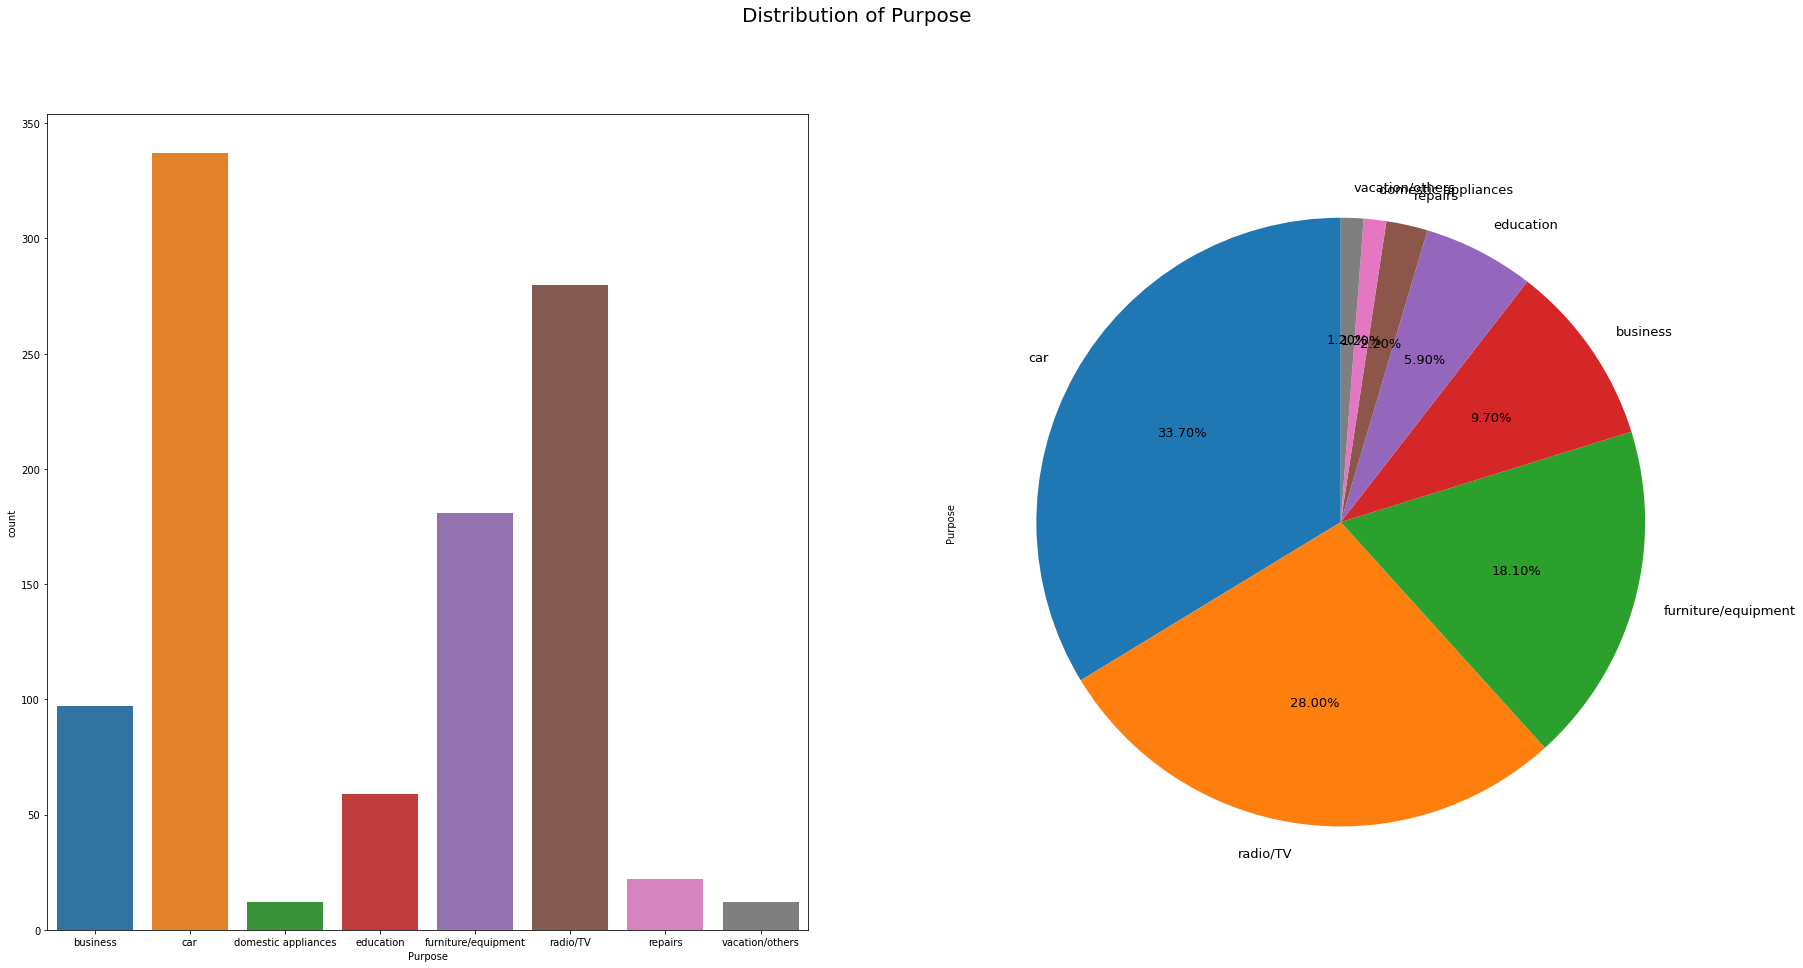

In [62]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (30,15))             # using subplot to get the graphs in same line, using figsize to get a bigger graph
sns.countplot(x=d1.Purpose , ax=ax[0])                                        # using countplot to get countplot, using ax[0] to get 1st countplot
d1.Purpose.value_counts().plot(kind='pie', autopct='%.2f%%', startangle=90, ax=ax[1], fontsize=13)    #Using plot and kind as pie to get a piechart with start angle as 90
fig.suptitle('Distribution of Purpose', fontsize=20)

From the above two graphs we can clearly see the distribution of Purpose, we can infer that count of Car catogery is more that is more people take loan to buy  cars the most.

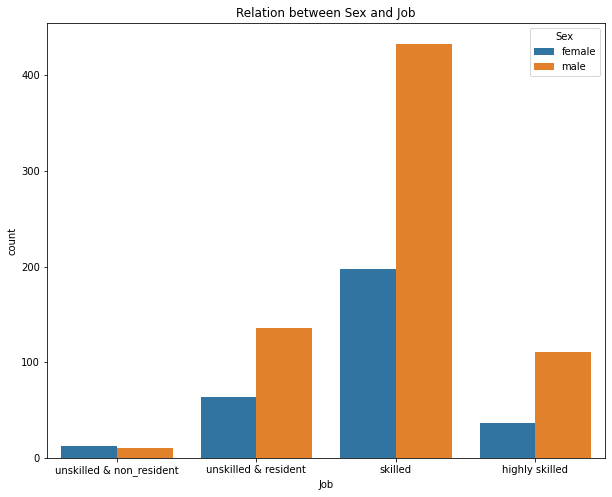

In [177]:
plt.figure(figsize=(10,8))
sns.countplot(hue='Sex', x='Job',data = d1)       #using countplot to get countplot
plt.title("Relation between Sex and Job")         #using plt.title to give the title for the graph
plt.show()                                        #to show the plot

The above plot shows the comparision of two categorical data that is Job and Sex, we can infer that both male and female workers are high in number in skilled job out of which male count is high.

Text(0.5, 1.0, 'Relation between Sex and Housing')

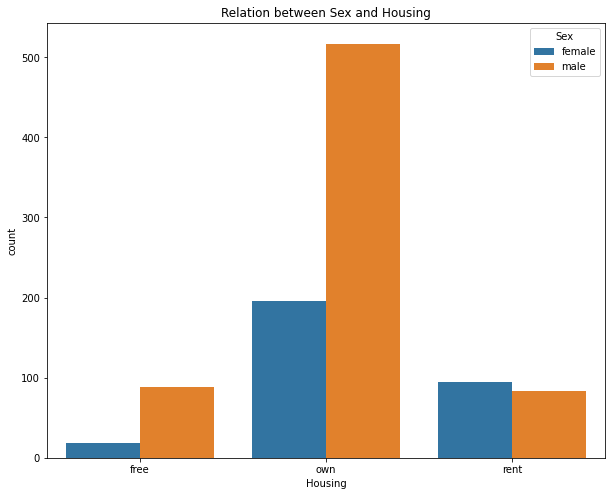

In [75]:
plt.figure(figsize=(10,8))
sns.countplot(hue='Sex', x='Housing',data = d1)        #using countplot to get countplot
plt.title("Relation between Sex and Housing")
plt.show()                                         #to show the plot

From the above graph which is a comparission between Housing and sex, we can infer that Housing category own has higher count out of which Male count is higher.

Text(0.5, 1.0, 'Relation between Sex and Saving accounts')

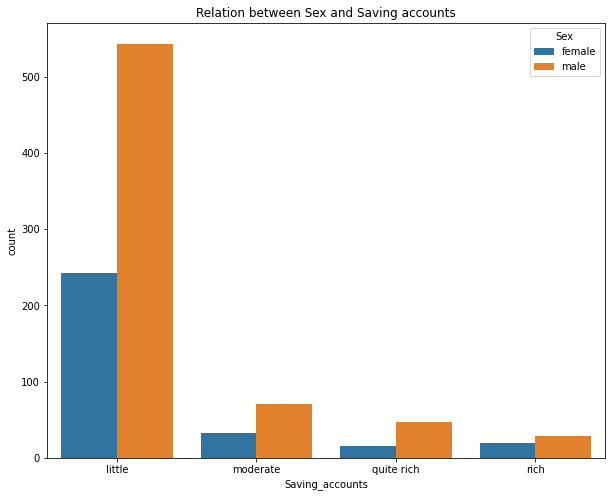

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(hue='Sex', x='Saving_accounts',data = d1)    #using countplot to get countplot
plt.title("Relation between Sex and Saving accounts")
plt.show()                                                 #to show the plot

From the above graph which is a comparission between Savings accounts and sex, we can infer that saving accounts category little has higher count out of which Male count is higher.

Text(0.5, 1.0, 'Relation between Sex and Checking account')

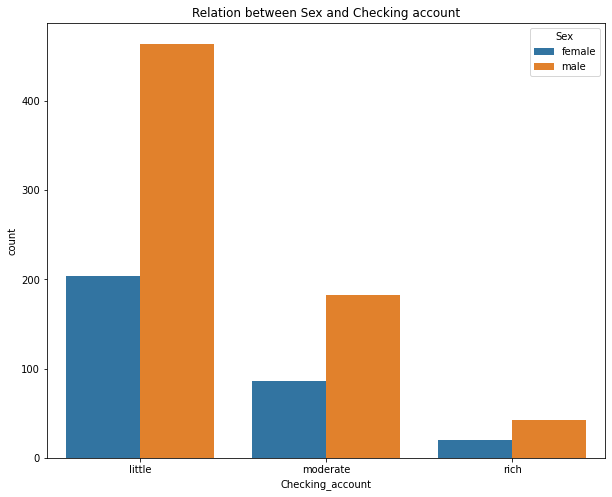

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(hue='Sex', x='Checking_account',data = d1)      #using countplot to get countplot
plt.title("Relation between Sex and Checking account")
plt.show()                                                  #to show the plot

From the above graph which is a comparission between Checking account and sex, we can infer that checking account category little has higher count out of which Male count is higher.

Text(0.5, 1.0, 'Relation between Sex and Purpose')

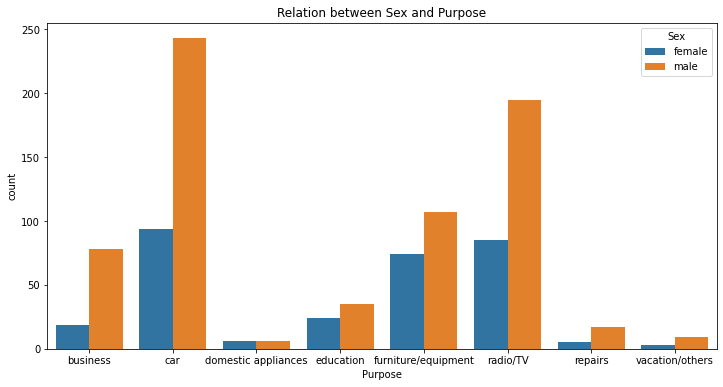

In [81]:
plt.figure(figsize=(12,6))
sns.countplot(hue='Sex', x='Purpose',data = d1)           #using countplot to get countplot
plt.title("Relation between Sex and Purpose")
plt.show()                                              #to show the plot

From the above graph which is a comparission between Purpose and sex, we can infer that Housing category own has higher count out of which Male count is higher.

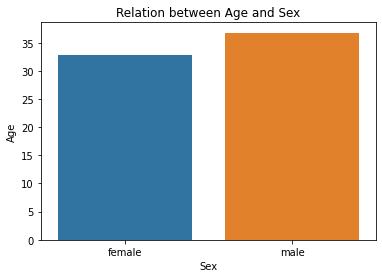

In [86]:
sns.barplot(data= d1, x='Sex', y= 'Age', ci=None)       #using barplot to get barplot
plt.title("Relation between Age and Sex")
plt.show()                                                  #to show the plot

From the above graph which is a comparission between Age and sex, we can infer that the average age of Male is 37 and that of Female is 33 in the given data set.

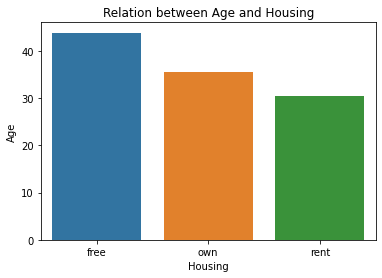

In [87]:
sns.barplot(data= d1, x='Housing', y= 'Age', ci=None)          #using barplot to get barplot
plt.title("Relation between Age and Housing")
plt.show()                                                       #to show the plot

From the above graph which is a comparission between Age and Housing, we can infer that the average age of Individuals with own house is is 46 in the given data set.

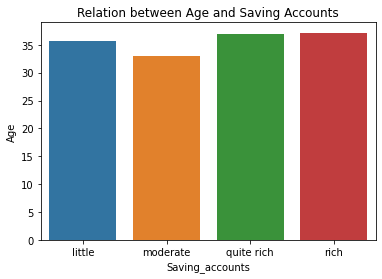

In [83]:
sns.barplot(data= d1, x='Saving_accounts', y= 'Age', ci=None)         #using barplot to get barplot
plt.title("Relation between Age and Saving Accounts")
plt.show()                                                             #to show the plot

From the above graph which is a comparission between Age and Saving accounts, we can infer that the average age of Individuals with quite rich status is 40 in the given data set.

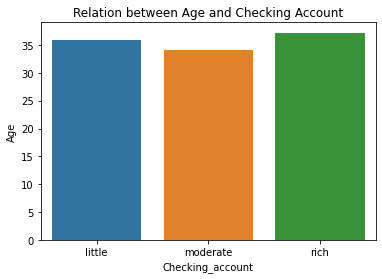

In [84]:
sns.barplot(data= d1, x='Checking_account', y= 'Age', ci=None)      #using barplot to get barplot
plt.title("Relation between Age and Checking Account")
plt.show()                                                            #to show the plot

From the above graph which is a comparission between Age and Checking accounts, we can infer that the average age of Individuals rich status is 40 in the given data set.

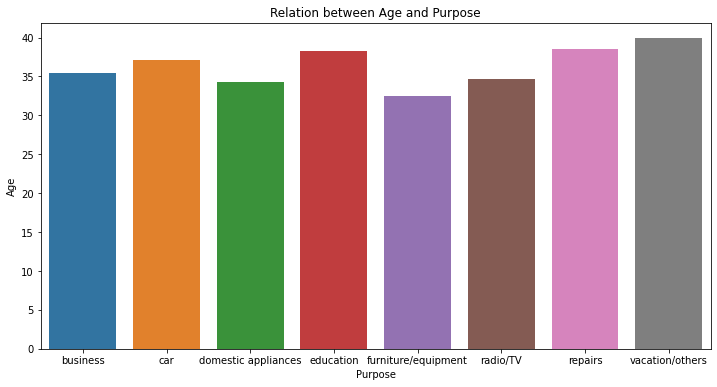

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(data= d1, x='Purpose', y= 'Age', ci=None)            #using barplot to get barplot
plt.title("Relation between Age and Purpose")
plt.show()                                                          #to show the plot

From the above graph which is a comparission between Age and Purpose, we can infer that the average age of Individuals with Purposes in the Graph.

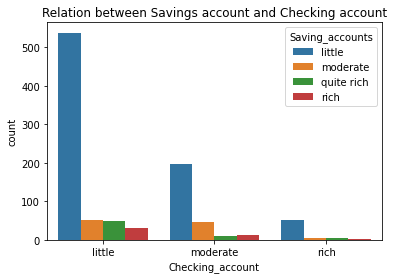

In [85]:
sns.countplot(hue='Saving_accounts', x='Checking_account',data = d1)          #using countplot to get countplot
plt.title("Relation between Savings account and Checking account")
plt.show()                                                                     #to show the plot

From above we can see the variation of Savings accounts with Checking Account. 

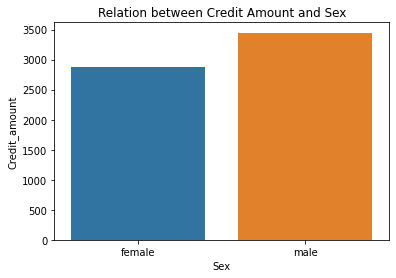

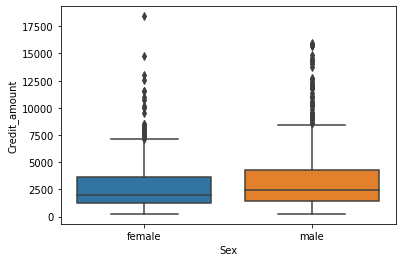

In [132]:
sns.barplot(data= d1, x='Sex', y= 'Credit_amount', ci=None)        #using barplot to get barplot
plt.title("Relation between Credit Amount and Sex")
plt.show()                                                             #to show the plot
sns.boxplot(data= d1, x='Sex', y= 'Credit_amount')                 #using boxplot to get boxplot
plt.show()                                                            #to show the plot

From above we can see the variation of Sex with Creadit_amount. Male individuls have higher credit amount.

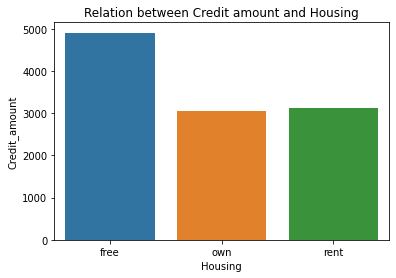

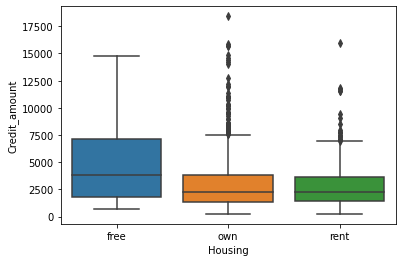

In [131]:
sns.barplot(data= d1, x='Housing', y= 'Credit_amount', ci=None)      #using barplot to get barplot
plt.title("Relation between Credit amount and Housing")
plt.show()                                                               #to show the plot
sns.boxplot(data= d1, x='Housing', y= 'Credit_amount')                #using boxplot to get boxplot
plt.show()

From above we can see the variation of Housing with Creadit amount.On an average free housing has higher credit amount.

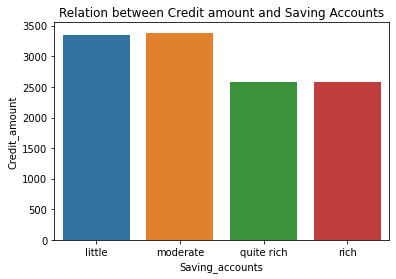

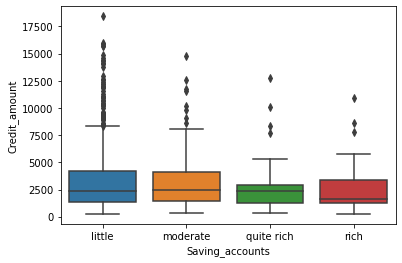

In [134]:
sns.barplot(data= d1, x='Saving_accounts', y= 'Credit_amount', ci=None)           #using barplot to get barplot
plt.title("Relation between Credit amount and Saving Accounts")
plt.show()
sns.boxplot(data= d1, x='Saving_accounts', y= 'Credit_amount')                    #using boxplot to get boxplot
plt.show()                                                                          #to show the plot

From above we can see the variation of Saving Accounts with Creadit amount. Little Category of Saving account has higher credit amount.

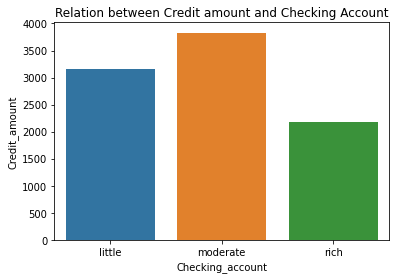

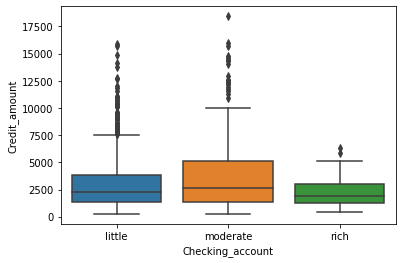

In [135]:
sns.barplot(data= d1, x='Checking_account', y= 'Credit_amount', ci=None)            #using barplot to get barplot
plt.title("Relation between Credit amount and Checking Account")
plt.show()
sns.boxplot(data= d1, x='Checking_account', y= 'Credit_amount')                     #using boxplot to get boxplot
plt.show()                                                                           #to show the plot

From above we can see the variation of Checking account with Creadit_amount.Moderate category of checking account have higher credit amount.

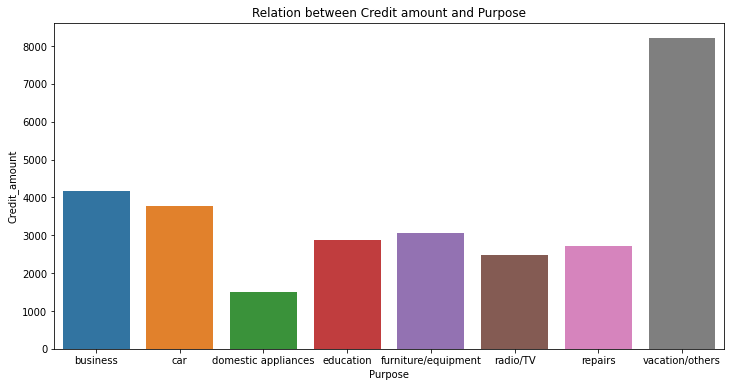

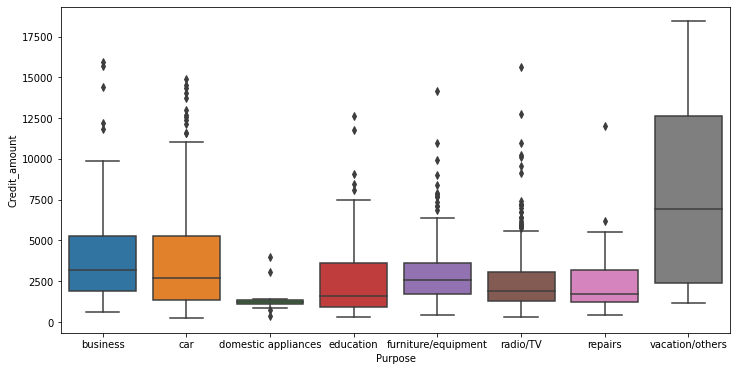

In [137]:
plt.figure(figsize=(12,6))
sns.barplot(data= d1, x='Purpose', y= 'Credit_amount', ci=None)          #using barplot to get barplot
plt.title("Relation between Credit amount and Purpose")
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data= d1, x='Purpose', y= 'Credit_amount')                    #using boxplot to get boxplot
plt.show()                                                                   #to show the plot

From above we can see the variation of Purpose with Creadit_amount.Vacation/others category of Purpose have higher credit amount.More than half of the applicants applied for loans less than 5,000.

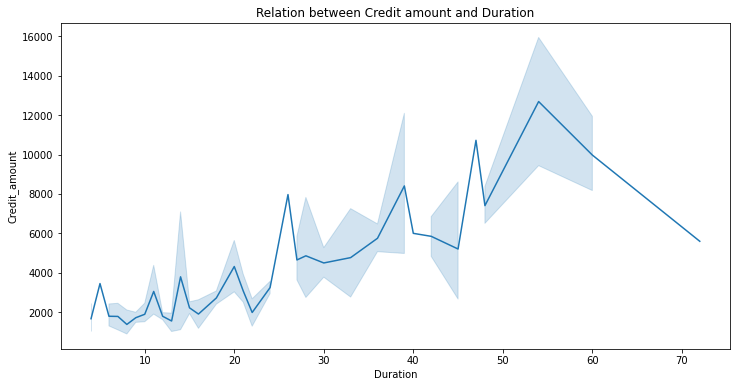

In [139]:
plt.figure(figsize=(12,6))
sns.lineplot(data=d1, x='Duration', y='Credit_amount')              #using lineplot to draw line graph with x as Duration and y as Credit amount
plt.title("Relation between Credit amount and Duration")
plt.show()                                                          #to show the plot

From the above graph we can clearly see the variation there is a slight linear relation as duration increasing credit amount increasing and at the end it's falling sudenly.

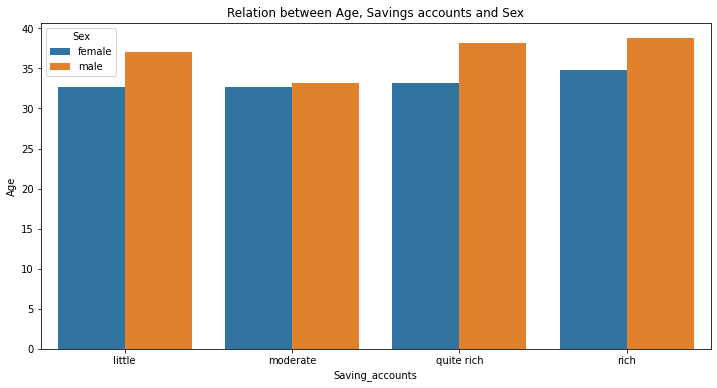

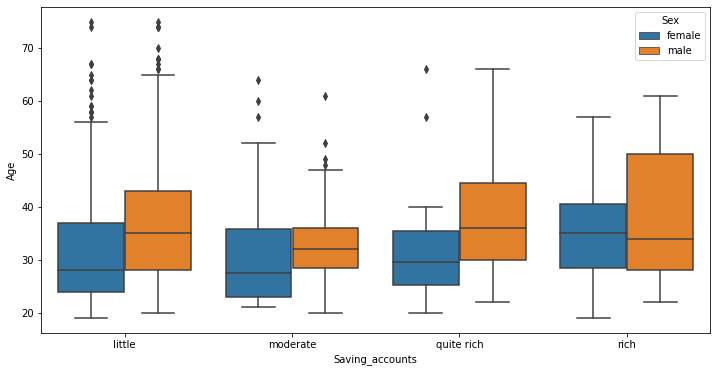

In [140]:
plt.figure(figsize=(12,6))
sns.barplot(data= d1, x='Saving_accounts', y= 'Age', hue='Sex', ci=None)      #using barplot to get barplot
plt.title("Relation between Age, Savings accounts and Sex")
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data= d1, x='Saving_accounts', y= 'Age', hue='Sex')               #using boxplot to get boxplot
plt.show()

The above graph shows relation between 3 parameters that is Age, sex and Saving accounts, we can infer that the rich males are more in number with average age of 37. We get a lot of information from the above graph like most of the rich male and female lie in at the age of 28 - 50 and so on.

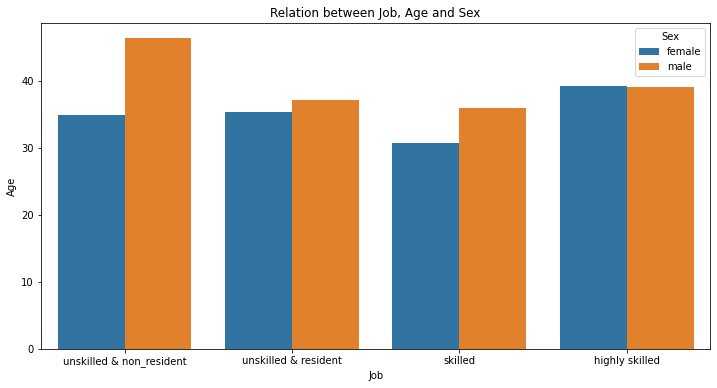

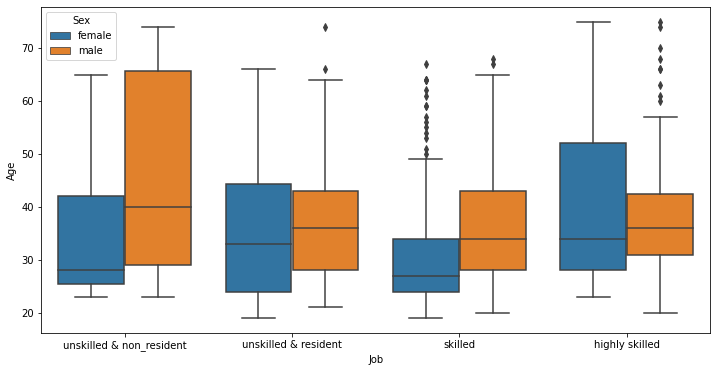

In [141]:
plt.figure(figsize=(12,6))
sns.barplot(data= d1, x='Job', y= 'Age', hue='Sex',ci=None)      #using barplot to get barplot
plt.title("Relation between Job, Age and Sex")
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data= d1, x='Job', y= 'Age', hue='Sex')              #using boxplot to get boxplot
plt.show()

The above graph shows relation with 3 parameters Job, Sex and Age, from the graph we get to see that most of the unskilled and non resident idividules have higher average age and that of skilled individules have lower average age.

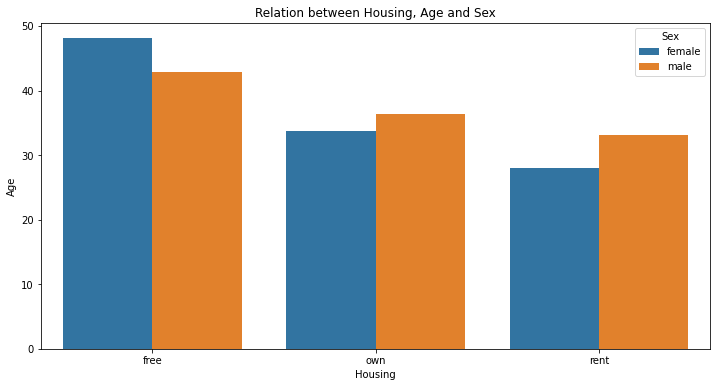

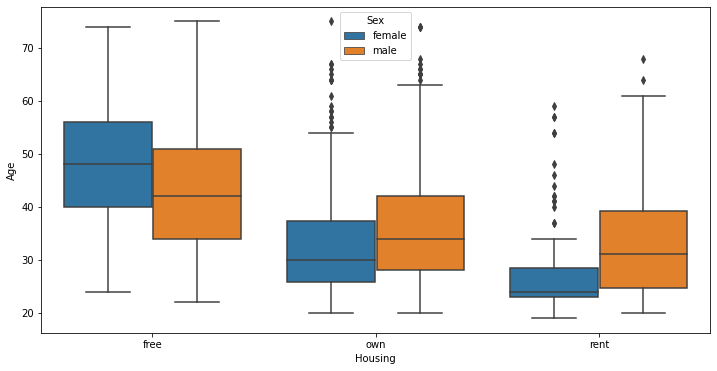

In [142]:
plt.figure(figsize=(12,6))
sns.barplot(data= d1, x='Housing', y= 'Age', hue='Sex',ci=None)           #using barplot to get barplot
plt.title("Relation between Housing, Age and Sex")
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data= d1, x='Housing', y= 'Age', hue='Sex')                  #using boxplot to get boxplot
plt.show()

The above graph shows relation with 3 parameters Housing, Sex and Age, from the graph we get to see that individuals living in free housing have higher average age and that too females average age is more in case of free housing, where a average age is less for those who are in rent housing and females average age is lesser than males average age.

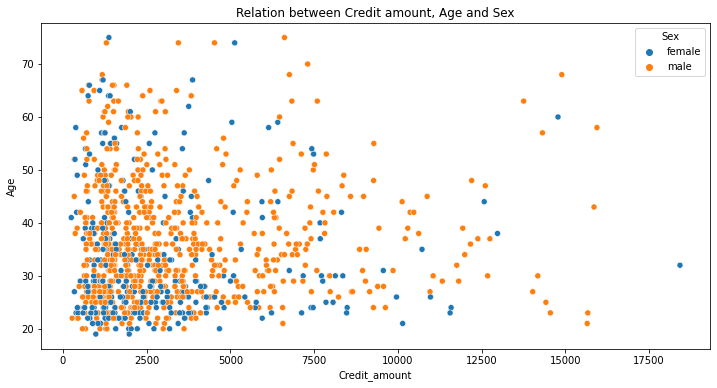

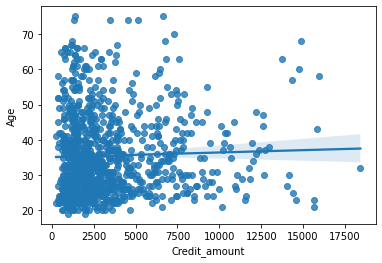

In [192]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = d1, x='Credit_amount', y='Age', hue = 'Sex')         #using scatterplot to draw the graph and find relation between numerical data
plt.title("Relation between Credit amount, Age and Sex")
plt.show()
sns.regplot(data = d1, x='Credit_amount', y='Age')                         #using regplot to draw the graph with line to find the relation

This above plot is numerical data vs numerical data here we can see no relationship with each other. The male distribution is scatered and we can get a reg plot and see a straight line which means no relation between the two.

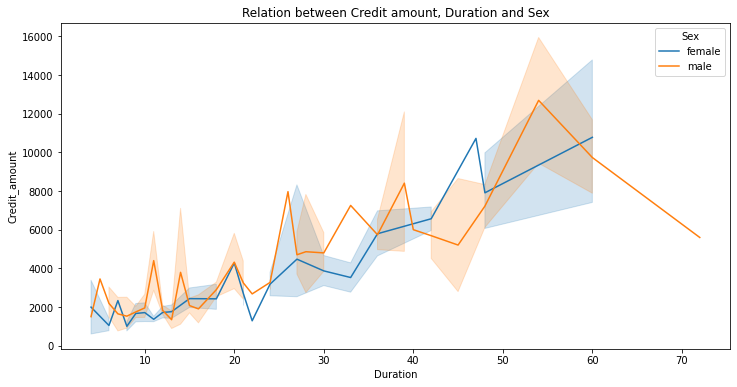

In [144]:
plt.figure(figsize=(12,6))
sns.lineplot(data=d1, x='Duration', y='Credit_amount', hue='Sex')          #using lineplot to draw line graph with x as Duration and y as Credit amount
plt.title("Relation between Credit amount, Duration and Sex")
plt.show()                                                                    #to show the plot

Here we can see a slight linear relation variation with male and female in terms of credit amount and duration, in case of female we can see the graph increasing with duration and credit amount where as male graph shows a sudden dip. Most of the loans issued had a duration of 12 and 24 months

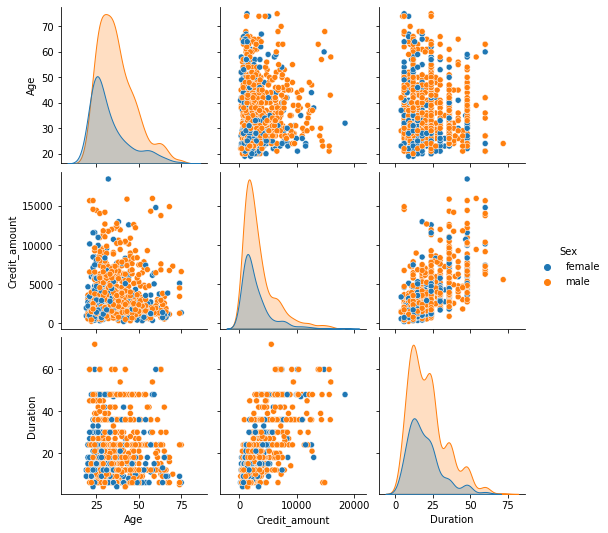

In [125]:
a= ['Age', 'Credit_amount', 'Duration', 'Sex']        # deriving the required columns
sns.pairplot(d1[a], hue="Sex")                        #using pairplot to draw multiple graphs in one go
plt.show()                                              #to show the plot

Here we can see pairplot with all the numerical data and we can see the positive skewness of the data and slight linear relationship with credit amount and duration, also we can observe thatcredit amount varies from hight to low in at a lower age.

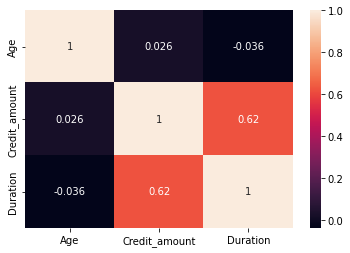

In [147]:
a= ['Age', 'Credit_amount', 'Duration']
sns.heatmap(d1[a].corr(method = 'spearman'), annot=True)      #using heatmap to find the correlation among the columns with spearman method
plt.show()

Here we are using spearman corellation due to presence of some outliers to see the correlaton among the columns from the above we can clearly see Credit amount and Duration has a slight corelation where as other columns have no linear correlation among them.

###How many highly skilled men (below 35 years) are staying in their own house?

In [180]:
m = EDA[EDA['Sex'] == 'male']        # taking the data from the main table where sex is male
m = m[m['Age'] < 35 ]                # taking the data where age is < 35
m = m[m['Job'] == 3]                 # taking the data where job is 3, using EDA data as we have modified job in d1
m = m[m['Housing']== 'own']          # taking the data where housing is own
m.Sex.value_counts()                 # counting the values in sex columns

male    28
Name: Sex, dtype: int64

In [223]:
q =EDA.loc[(EDA.Job == 3) & (EDA.Sex == 'male') & (EDA.Housing == 'own') & (EDA.Age < 35)].shape[0]     #using loc to locate and bitwize '&' operator to get the desired result
print('Number of Highly Skilled men(below 35) staying in their own house is',q)

Number of Highly Skilled men(below 35) staying in their own house is 28


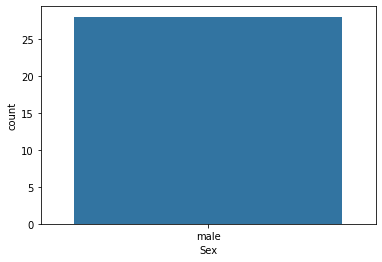

In [190]:
sns.countplot(x='Sex', data = m)         #using countplot to get countplot

From the above we get to see that there are 28 men who's age is below 35 staying at own house and are skilled.

###Visualize men and females separately for their social status.

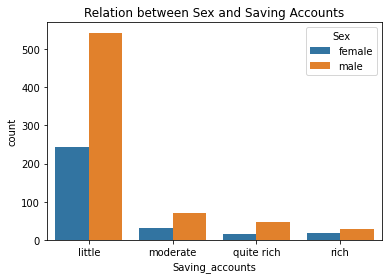

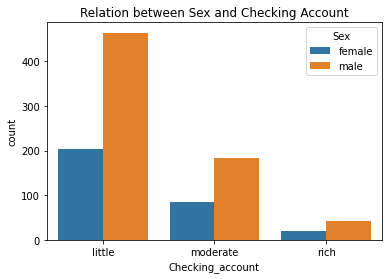

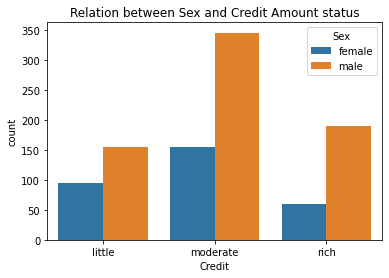

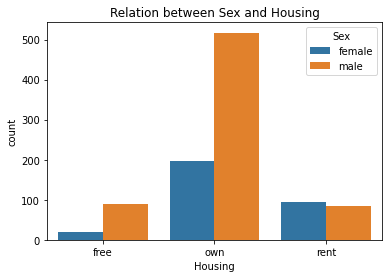

In [225]:
sns.countplot(x ='Saving_accounts', hue = "Sex", data = d1)    #using countplot to get countplot
plt.title("Relation between Sex and Saving Accounts")
plt.show()                                                         #to show the plot
sns.countplot(x ='Checking_account', hue = "Sex", data = d1)      #using countplot to get countplot
plt.title("Relation between Sex and Checking Account")
plt.show()
d1['Credit'] = pd.qcut(d1['Credit_amount'],q=[0, .25, .75, 1],labels=['little', 'moderate', 'rich'])   #using qcut to add bins by spliting the credit amount and giving lables
sns.countplot(x ='Credit', hue = "Sex", data = d1)                     #using countplot to get countplot
plt.title("Relation between Sex and Credit Amount status")  
plt.show()
sns.countplot(x ='Housing', hue = "Sex", data = d1)                  #using countplot to get countplot
plt.title("Relation between Sex and Housing")                         #using plt.title to give the title for the graph
plt.show()                                                           #to show the plot

From all the above graph we can clearly see that social status of male is more than female but also the credit borrowers count is also more for male.